In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from scipy.optimize import newton
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pypvcell.solarcell import SQCell, MJCell,ResistorCell,SolarCell,SeriesConnect,ParallelConnect
from pypvcell.illumination import load_astm

In [3]:
r1cell=ResistorCell(1.0)
r2cell=ResistorCell(2.0)

## Series Connect

In [4]:
sc_comp=SeriesConnect([r1cell, r2cell])

3.0

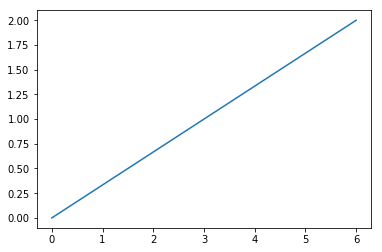

In [5]:
test_c=np.linspace(0,2,10)
test_v=sc_comp.get_v_from_j(test_c)
plt.plot(test_v,test_c)
test_v[5]/test_c[5]

In [6]:
test_v=3
test_c=sc_comp.get_single_j_from_v(test_v)
test_c

1.0

3.0

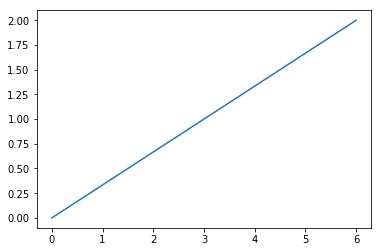

In [7]:
test_v=np.linspace(0,6,10)
test_c=sc_comp.get_j_from_v(test_v)
plt.plot(test_v,test_c)
test_v[5]/test_c[5]

In [8]:
r1cell.get_j_from_v_by_newton(2.5)

2.5

## Parallel connect

In [9]:
pp_comp=ParallelConnect([r1cell, r2cell])

0.66666666666666674

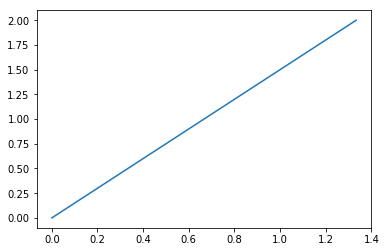

In [10]:
test_c=np.linspace(0,2,10)
test_v=pp_comp.get_v_from_j(test_c)
plt.plot(test_v,test_c)
test_v[5]/test_c[5]

## Test diodes (no jsc)

In [11]:
d1=SQCell(1.42,300)
d2=SQCell(1.42,300)

In [12]:
sd=SeriesConnect([d1,d2])

In [13]:
sd.get_single_j_from_v(1.6,0.002)

0.0043567557037776025

In [14]:
d1.get_j_from_v(0.8)

0.0043567557037776017

## Test diodes (with jsc)

In [15]:
from pypvcell.illumination import load_astm

In [16]:
d1=SQCell(1.42,300)
d2=SQCell(1.42,300)
d1.set_input_spectrum(load_astm())
d2.set_input_spectrum(load_astm())

320.42957639087012

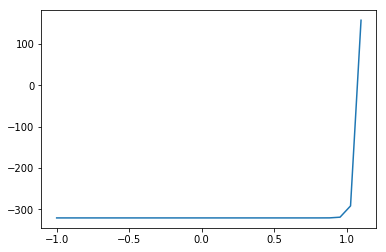

In [17]:
test_v=np.linspace(-1,1.1,30)
plt.plot(test_v,d1.get_j_from_v(test_v))
d1.jsc

In [18]:
sd=SeriesConnect([d1,d2])

In [19]:
sd.get_single_j_from_v(3.0,10)

2504087940.8880243

In [20]:
d1.get_j_from_v(1.5)

2504087940.888041

In [21]:
sd.get_single_j_from_v(1.6,-310)

/Users/kanhua/Dropbox/Programming/pypvcell/pypvcell/ivsolver.py:94: RuntimeWarning: invalid value encountered in log
  return (n1 * sc.k * temperature / sc.e) * np.log(log_component), n_current, index


RuntimeError: Failed to converge after 50 iterations, value is nan

In [47]:
lower_bound_j=d1.get_j_from_v(-10)
sd.get_single_j_from_v_bisect(2.0,lower_bound_j,-300)

-310.4521973265769

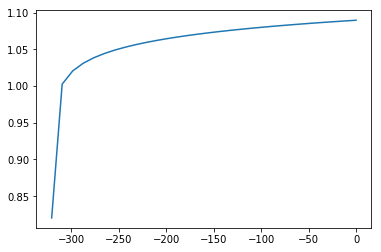

In [45]:
test_v=np.linspace(-320.42,0,30)
plt.plot(test_v,d1.get_v_from_j(test_v))